In [1073]:
"""
 * Asignatura: Laboratorio Métodos Computacionales en Ciencias
 * Nombre: María Camila Casas Díaz
 * Código: 201813057
"""

'\n * Asignatura: Laboratorio Métodos Computacionales en Ciencias\n * Nombre: María Camila Casas Díaz\n * Código: 201813057\n'

In [1074]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 4

Con base a los métodos vistos en clase resuelva las siguientes dos preguntas

## (A) Integrales

* $\int_{0}^{1}x^{-1/2}\,\text{d}x$
* $\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$
* $\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

In [1075]:
# Primera Integral
def f(x):
    return 2*np.sqrt(x)
xi = 1
xf = 0
f1 = f(xi) - f(xf)
print("La integral de x^(-1/2) dx en el intervalo de 0 a 1 es:",f1,"Aprox")

# Segunda Integral
u1,w1 = np.polynomial.laguerre.laggauss(100)
f2 = np.log(u1) @ w1
print("La integral de e^(-x)ln(x) dx en el intervalo de 0 a infinito es:",f2,"Aprox")

# Tercera Integral
x = np.arange(1e-5,1e5,0.1) # Evitamos que la integral sea divergente
f = np.sin(x)/x
f3 = sum((f[:-1] + f[1:])/2)*0.1
print("La integral de sin(x)/x dx en el intervalo de 0 a infinito es:",f3,"Aprox")


La integral de x^(-1/2) dx en el intervalo de 0 a 1 es: 2.0 Aprox
La integral de e^(-x)ln(x) dx en el intervalo de 0 a infinito es: -0.5709082934753861 Aprox
La integral de sin(x)/x dx en el intervalo de 0 a infinito es: 1.5707962293172444 Aprox


## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la **Tarea 3 (D)** ;
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). Ajuste la transformada de Fourier para los datos de la **Tarea 3** usando el método de regresión exacto de la **Tarea 3 (C)** y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.

Valores tranformada en x [ 0.    0.24  0.48  0.72  0.96  1.2   1.44  1.68  1.92  2.16  2.4   2.64
  2.88 -2.88 -2.64 -2.4  -2.16 -1.92 -1.68 -1.44 -1.2  -0.96 -0.72 -0.48
 -0.24]
Valores tranformada en y [14.24189809  6.63558254  1.77707324  0.71258899  0.37923269  0.06824589
  0.14221717  0.11396422  0.09858762  0.09563531  0.08999097  0.08711802
  0.08585882  0.08585882  0.08711802  0.08999097  0.09563531  0.09858762
  0.11396422  0.14221717  0.06824589  0.37923269  0.71258899  1.77707324
  6.63558254]


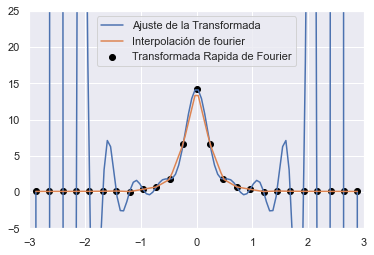

In [1076]:
# Datos Tarea 3
X,Y = pd.read_pickle("ex1.gz").T.values

# Función Tarea 3(D)
def f(x,a,b,c,y):
    return  a/((x-b)**2+c)**y

# Valores en el Intervalo
popt,pcov = sp.optimize.curve_fit(f,X,Y) # popt: parametros (a,b,c,y) que mejor se ajustan. 
                                         # pcov: variancia y covariancia de los parametros.
x1 = np.linspace(0,4,25)
y1 = f(x1,*popt)

# Fourier 
frecuencies = np.fft.fftfreq(25, x1[1])
fourier = abs(np.fft.fft(y1))

# Interpolación
fftfregMin = frecuencies.min()
fftfregMax = frecuencies.max()

frecuencies_interpolated = np.linspace(fftfregMin,fftfregMax,100)
fourier_interpolated = sp.interpolate.interp1d(frecuencies,fourier)

y2 = fourier_interpolated(frecuencies_interpolated)

# Ajuste
van = np.vander(frecuencies,25)
inverse = np.linalg.pinv(van) @ fourier

# Valores Transformada
print("Valores tranformada en x",frecuencies)
print("Valores tranformada en y",fourier)

# Limites Grafica
plt.ylim(-5,25)
plt.xlim(-3,3)

# Grafica de Comparación
plt.scatter(frecuencies,fourier,color="black",label="Transformada Rapida de Fourier")
plt.plot(frecuencies_interpolated,np.vander(frecuencies_interpolated,25) @ inverse, label="Ajuste de la Transformada")
plt.plot(frecuencies_interpolated,y2,label="Interpolación de fourier")
plt.legend()

# Guardar Grafica
plt.savefig("CasasCamila_GraficaFourierT4.png")